In [1]:
from pprint import pprint as pp
from matplotlib import pyplot as plt

In [2]:
# names of hurricanes
names = ['Cuba I', 'San Felipe II Okeechobee', 'Bahamas', 'Cuba II', 'CubaBrownsville', 'Tampico', 'Labor Day', 'New England', 'Carol', 'Janet', 'Carla', 'Hattie', 'Beulah', 'Camille', 'Edith', 'Anita', 'David', 'Allen', 'Gilbert', 'Hugo', 'Andrew', 'Mitch', 'Isabel', 'Ivan', 'Emily', 'Katrina', 'Rita', 'Wilma', 'Dean', 'Felix', 'Matthew', 'Irma', 'Maria', 'Michael']

# months of hurricanes
months = ['October', 'September', 'September', 'November', 'August', 'September', 'September', 'September', 'September', 'September', 'September', 'October', 'September', 'August', 'September', 'September', 'August', 'August', 'September', 'September', 'August', 'October', 'September', 'September', 'July', 'August', 'September', 'October', 'August', 'September', 'October', 'September', 'September', 'October']

# years of hurricanes
years = [1924, 1928, 1932, 1932, 1933, 1933, 1935, 1938, 1953, 1955, 1961, 1961, 1967, 1969, 1971, 1977, 1979, 1980, 1988, 1989, 1992, 1998, 2003, 2004, 2005, 2005, 2005, 2005, 2007, 2007, 2016, 2017, 2017, 2018]

# maximum sustained winds (mph) of hurricanes
max_sustained_winds = [165, 160, 160, 175, 160, 160, 185, 160, 160, 175, 175, 160, 160, 175, 160, 175, 175, 190, 185, 160, 175, 180, 165, 165, 160, 175, 180, 185, 175, 175, 165, 180, 175, 160]

# areas affected by each hurricane
areas_affected = [['Central America', 'Mexico', 'Cuba', 'Florida', 'The Bahamas'], ['Lesser Antilles', 'The Bahamas', 'United States East Coast', 'Atlantic Canada'], ['The Bahamas', 'Northeastern United States'], ['Lesser Antilles', 'Jamaica', 'Cayman Islands', 'Cuba', 'The Bahamas', 'Bermuda'], ['The Bahamas', 'Cuba', 'Florida', 'Texas', 'Tamaulipas'], ['Jamaica', 'Yucatn Peninsula'], ['The Bahamas', 'Florida', 'Georgia', 'The Carolinas', 'Virginia'], ['Southeastern United States', 'Northeastern United States', 'Southwestern Quebec'], ['Bermuda', 'New England', 'Atlantic Canada'], ['Lesser Antilles', 'Central America'], ['Texas', 'Louisiana', 'Midwestern United States'], ['Central America'], ['The Caribbean', 'Mexico', 'Texas'], ['Cuba', 'United States Gulf Coast'], ['The Caribbean', 'Central America', 'Mexico', 'United States Gulf Coast'], ['Mexico'], ['The Caribbean', 'United States East coast'], ['The Caribbean', 'Yucatn Peninsula', 'Mexico', 'South Texas'], ['Jamaica', 'Venezuela', 'Central America', 'Hispaniola', 'Mexico'], ['The Caribbean', 'United States East Coast'], ['The Bahamas', 'Florida', 'United States Gulf Coast'], ['Central America', 'Yucatn Peninsula', 'South Florida'], ['Greater Antilles', 'Bahamas', 'Eastern United States', 'Ontario'], ['The Caribbean', 'Venezuela', 'United States Gulf Coast'], ['Windward Islands', 'Jamaica', 'Mexico', 'Texas'], ['Bahamas', 'United States Gulf Coast'], ['Cuba', 'United States Gulf Coast'], ['Greater Antilles', 'Central America', 'Florida'], ['The Caribbean', 'Central America'], ['Nicaragua', 'Honduras'], ['Antilles', 'Venezuela', 'Colombia', 'United States East Coast', 'Atlantic Canada'], ['Cape Verde', 'The Caribbean', 'British Virgin Islands', 'U.S. Virgin Islands', 'Cuba', 'Florida'], ['Lesser Antilles', 'Virgin Islands', 'Puerto Rico', 'Dominican Republic', 'Turks and Caicos Islands'], ['Central America', 'United States Gulf Coast (especially Florida Panhandle)']]

# damages (USD($)) of hurricanes
damages = ['Damages not recorded', '100M', 'Damages not recorded', '40M', '27.9M', '5M', 'Damages not recorded', '306M', '2M', '65.8M', '326M', '60.3M', '208M', '1.42B', '25.4M', 'Damages not recorded', '1.54B', '1.24B', '7.1B', '10B', '26.5B', '6.2B', '5.37B', '23.3B', '1.01B', '125B', '12B', '29.4B', '1.76B', '720M', '15.1B', '64.8B', '91.6B', '25.1B']

# deaths for each hurricane
deaths = [90,4000,16,3103,179,184,408,682,5,1023,43,319,688,259,37,11,2068,269,318,107,65,19325,51,124,17,1836,125,87,45,133,603,138,3057,74]

In [3]:
# Update damages function
def update_damages(lst_of_damages):
    """Function takes a list parameter and changes the recorded value
    from B to billions, or 1,000,000,000 and M to millions, or 1,000,000.
    If the damages were not recorded, the function does not change the value
    and it's left as is.
    
    Example:
    >>> update_damages(['Damages not recorded', '100M', '40M'])
    ['Damages not recorded', 100000000.0, 40000000.0]
    """
    result = []
    for item in lst_of_damages:
        if 'M' in item:
            item = float(item.strip('M')) * 1000000  # Change string to millions, i.e. 1,000,000
            result.append(item)
        elif 'B' in item: 
            item = float(item.strip('B')) * 1000000000  # Change string to billions, i.e. 1,000,000,000
            result.append(item)
        else:
            result.append(item)  # The string is 'Damages not recorded'
    return result

In [13]:
# Construct hurricane dictionary function
def build_hurricane_dictionary(list_names=names, list_months=months, list_years=years, list_max_winds=max_sustained_winds, list_areas_affected=areas_affected, list_damages=updated_damages, list_deaths=deaths):
    """Constructs a dictionary made out of lists. The keys of the dict are the names of the hurricanes and
    the values are dictionaries containing a key for each piece of data about each hurricane.
    Parameters are all lists:
    names: names of the hurricanes
    months: months in which the hurricanes occurred
    years: years in which the hurricanes occurred
    max_sustained_winds: maximum sustained winds (miles per hour) of the hurricanes
    areas_affected: list of different areas affected by each of the hurricanes
    deaths: total number of deaths caused by each of the hurricanes
    """
    result = {}
    
    for name, month, year, wind, area, damage, deaths in zip(list_names, list_months, list_years, list_max_winds, list_areas_affected, list_damages, list_deaths):
        result[name] = {
                        'Name': name, 
                        'Month': month, 
                        'Year': year, 
                        'Max Sustained Wind': wind,
                        'Areas Affected': area,
                        'Damage': damage,
                        'Deaths': deaths
                       }
    return result

In [5]:
# Construct hurricane by year dictionary function
def build_hurricanes_by_year(hurricane_dictionary):
    """Converts the current dictionary of hurricanes to a new dictionary
    where the keys are years and the values are lists containing a dictionary
    for each hurricane that occurred in that year.
    """
    result = {}
    for hurricane, data_dict in hurricane_dictionary.items():
        current_year = data_dict['Year']
        current_hurricane = data_dict
        
        if current_year not in result:  # The year has not been seen in the iteration
            result[current_year] = [ current_hurricane ]
        else:  # There is already a hurricane that happened in that year
            result[current_year].append(current_hurricane)
            
    return result

In [6]:
# Count affected areas function here
def count_affected_areas(hurricane_dictionary):
    """Counts how often each area is listed as an affected area of a hurricane.
    Returns a dictionary where the keys are each affected area and the values
    are counts of how many times the areas were affected by a hurricane.
    """
    areas_dict = {}

    for cane in hurricanes.values():
        for area in cane['Areas Affected']:
            if area not in areas_dict:  # Check if the area has not been seen before
                areas_dict[area] = 1
            else:  # If we already have an area, just increase the count
                areas_dict[area] += 1
    return areas_dict

In [7]:
# Find most affected area function
def find_most_affected_area(area_dictionary):
    """Finds the area affected by the most hurricanes and how
    often it was hit.
    The parameter is an affected_area_count dictionary
    """
    # We need a starting point so we can compare every value in the
    # dictionary and update accordingly
    most_affected_count = 0

    for area in area_dictionary:
        if area_dictionary[area] > most_affected_count:
            most_affected = area
            most_affected_count = area_dictionary[area]
    # Return a tuple of (most affected area, number of times it has been hit by a hurricane)
    return (most_affected, most_affected_count)

In [8]:
# Greatest number of deaths
def find_deadliest_hurricane(hurricane_dictionary):
    """Finds the hurricane that caused the greatest number of deaths
    and how many deaths it caused
    """
    max_number_of_deaths = 0
    
    for hurricane, data in hurricane_dictionary.items():
        if data['Deaths'] > max_number_of_deaths:
            max_number_of_deaths = data['Deaths']
            deadliest_hurricane = hurricane
    # Return a tuple of (hurricane name, number of deaths)
    return (deadliest_hurricane, max_number_of_deaths)

In [9]:
# Categorise hurricanes by mortality
def rate_hurricanes_by_mortality(hurricanes_dictionary):
    """Rates hurricanes on a mortality scale according to the following ratings, 
    0: 0
    1: 100
    2: 500
    3: 1000
    4: 10000
    Hurricanes with a 1 mortality rating would have resulted in greater than 0 
    but less than or equal to 100 deaths. A hurricane with a 5 mortality rating 
    would have resulted in greater than 10000 deaths.
    Hurricanes will be stored in a new dictionary where the keys are mortality ratings and the 
    values are lists containing a dictionary for each hurricane that falls into that mortality rating.
    """
    hurricanes_by_mortality = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
    for hurricane, data_dict in hurricanes_dictionary.items():
        current_deaths = data_dict['Deaths']
        current_hurricane = data_dict

        if current_deaths <= 100 and current_deaths > 0:
            hurricanes_by_mortality[1].append(current_hurricane)
        elif current_deaths <= 500 and current_deaths > 100:
            hurricanes_by_mortality[2].append(current_hurricane)
        elif current_deaths <= 1000 and current_deaths > 500:
            hurricanes_by_mortality[3].append(current_hurricane)
        elif current_deaths <= 10000 and current_deaths > 1000:
            hurricanes_by_mortality[4].append(current_hurricane)
        elif current_deaths > 10000:
            hurricanes_by_mortality[5].append(current_hurricane)
        else:
            hurricanes_by_mortality[0].append(current_hurricane)
    return hurricanes_by_mortality

In [10]:
# Greatest damage function
def find_most_destructive_hurricane(hurricane_dictionary):
    """Finds the hurricane that caused the greatest damage, and how costly it was
    in terms of US$ costs.
    """
    max_damages = 0
    for hurricane, data in hurricane_dictionary.items():
        if data['Damage'] == 'Damages not recorded':
            continue
        if data['Damage'] > max_damages:
            max_damages = data['Damage']
            most_destructive_hurricane = hurricane
        
    return (most_destructive_hurricane, max_damages)

In [11]:
# Categorise by damage
def rate_hurricanes_by_damage(hurricane_dictionary):
    """rates hurricanes on a damage scale according 
    to the following ratings, where the key is the rating 
    and the value is the upper bound of damage for that rating.
    0: 0,
    1: 100000000
    2: 1000000000
    3: 10000000000
    4: 50000000000
    hurricane with a 1 damage rating would have resulted in damages 
    greater than 0 USD but less than or equal to 100000000 USD. 
    A hurricane with a 5 damage rating would have resulted in 
    damages greater than 50000000000 USD.
    """
    # This will be used to compare and assign ratings
    damage_scale = {0: 0, 1: 100000000, 2: 1000000000, 3: 10000000000, 4: 50000000000}
    
    # Initialise a new dictionary that will hold the hurricanes in their
    # respective rating
    hurricanes_by_damage = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    
    for hurricane in hurricane_dictionary:
        current_damage = hurricane_dictionary[hurricane]['Damage']

        if current_damage == 'Damages not recorded':
            hurricanes_by_damage[0].append(hurricane)
        elif current_damage > damage_scale[4]:  # This is a cat 5 hurricane
            hurricanes_by_damage[5].append(hurricane)
        elif current_damage <= damage_scale[4] and current_damage > damage_scale[3]:  # This is a cat 4 hurricane
            hurricanes_by_damage[4].append(hurricane)
        elif current_damage <= damage_scale[3] and current_damage > damage_scale[2]:  # This is a cat 3 hurricane
            hurricanes_by_damage[3].append(hurricane)
        elif current_damage <= damage_scale[2] and current_damage > damage_scale[1]:  # This is a cat 2 hurricane
            hurricanes_by_damage[2].append(hurricane)
        elif current_damage <= damage_scale[1] and current_damage > damage_scale[0]:  # This is a cat 1 hurricane
            hurricanes_by_damage[1].append(hurricane)
    return hurricanes_by_damage

## Workflow of Analysis

In [14]:
# Fix all the damages in the damages list and create a new list named "updated_damages"
# The damages will all be floats or "Damage not recorded"
updated_damages = update_damages(damages)

# Create a hurricanes dictionary using the name of the hurricane as keys
hurricanes = build_hurricane_dictionary()

# Create another dictionary using the years as keys and hurricanes as values. This will tell me which hurricanes happened in which year
hurricanes_by_year = build_hurricanes_by_year(hurricanes)

# You will need a new dictionary using areas as keys and counts as values to determine later what area was most affected
# Build a dictionary that has an area as keys
# and the count for values
# Example Mexico: 7 means Mexico has been affected 7 times
areas_affected_count = count_affected_areas(hurricanes)

# Display the most affected area and also the deadliest hurricane
most_affected = find_most_affected_area(areas_affected_count)
deadliest_hurricane = find_deadliest_hurricane(hurricanes)

# Create a dictionary that rates hurricanes by mortality
# This means a new dictionary will have death ratings as keys and all the hurricanes that fall in
# that category
hurricanes_by_mortality = rate_hurricanes_by_mortality(hurricanes)

# Another useful analysis is to find the most destructive hurricane
# For this task, we can assess the amount of damages caused by a hurricane in US$
most_destructive = find_most_destructive_hurricane(hurricanes)

# Finally it's also useful to categorise hurricanes by destruction
# This means a new dictionary will have the damage rating as keys and all the hurricanes
# that correspond to that level of destruction (assessed by amount of US$)
hurricanes_by_damage = rate_hurricanes_by_damage(hurricanes)

In [15]:
# pp(hurricanes)
# pp(hurricanes_by_year)
# pp(areas_affected_count)
# print(most_affected)
# print(deadliest_hurricane)
# pp(hurricanes_by_mortality)
# print(most_destructive)
# pp(hurricanes_by_damage)

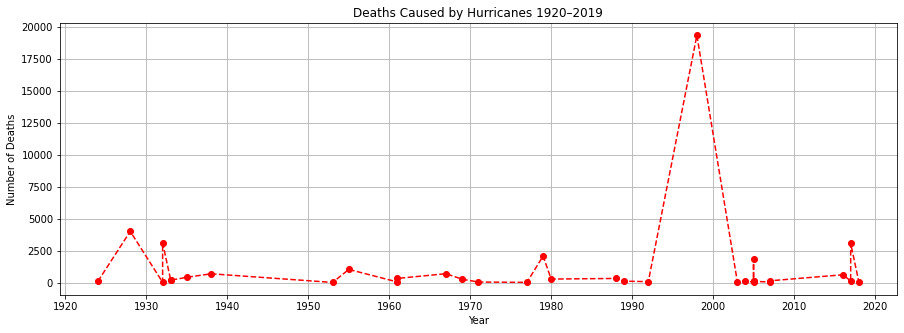

In [40]:
plt.figure(figsize=(15,5))
ax = plt.subplot()
plt.plot(years, deaths, marker='o', linestyle='--', color='red')
plt.grid(True)
plt.title('Deaths Caused by Hurricanes 1920–2019')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
ax.set_xticks(list(range(1920, 2030, 10)))
plt.show()

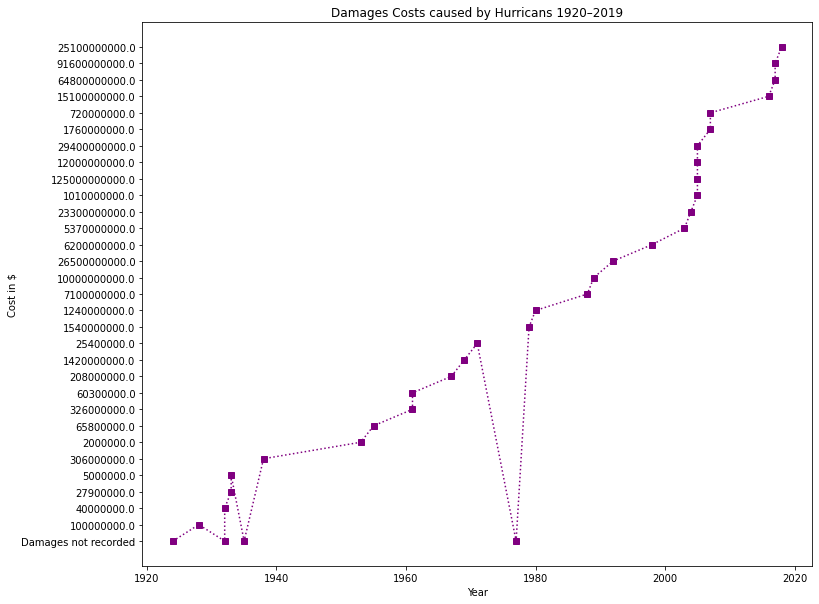

In [30]:
plt.figure(figsize=(12,10))
ax = plt.subplot()
plt.plot(years, updated_damages, 
         marker='s', linestyle=':', color='purple')
plt.title('Damages Costs caused by Hurricans 1920–2019')
plt.xlabel('Year')
plt.ylabel('Cost in $')

plt.show()